In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from __future__ import print_function
import os
data_path = ['data/']

## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`).
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type.

In [ ]:
train_file_path= os.sep.join(data_path+['Adv_IMC_train.csv'])
train_df = pd.read_csv(train_file_path,sep=',')
test_df = pd.read_csv('Adv_IMC_test.csv')

In [ ]:
train_df['Weight']=train_df['Weight'].str.replace('kg','')
train_df['Ram']=train_df['Ram'].str.replace('GB','')
train_df['Ram']=train_df['Ram'].astype(int)
train_df['Weight']=train_df['Weight'].astype(float)

In [ ]:
test_df['Weight']=test_df['Weight'].str.replace('kg','')
test_df['Ram']=test_df['Ram'].str.replace('GB','')
test_df['Ram']=test_df['Ram'].astype(int)
test_df['Weight']=test_df['Weight'].astype(float)

In [ ]:
train_df['Product']

0                                    250 G6
1            X541NA (N3350/4GB/1TB/FHD/W10)
2       15-AC110nv (i7-6500U/6GB/1TB/Radeon
3                             Inspiron 7559
4                             Blade Stealth
                       ...                 
1037                         Aspire F5-573G
1038      15-bs078cl (i7-7500U/8GB/2TB/W10)
1039                    Pavilion 15-AW003nv
1040                          ThinkPad E570
1041                              Yoga Book
Name: Product, Length: 1042, dtype: object

In [ ]:
import numpy as np
index_NaN_inches = list(train_df["Inches"][train_df["Inches"].isnull()].index)
for i in index_NaN_inches :
    Inches_med = train_df["Inches"].median()
    Inches_pred = train_df["Inches"][train_df['Weight'] == train_df.iloc[i]["Weight"]].median()
    if not np.isnan(Inches_pred) :
        train_df['Inches'].iloc[i] = Inches_pred
    else :
        train_df['Inches'].iloc[i] = Inches_med

C:\Users\user\miniconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\user\miniconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\user\miniconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [ ]:
drop_target=list(set(train_df.Company).difference(set(test_df.Company)))

In [ ]:
train_df_com=train_df[~train_df['Company'].isin(drop_target)]
train_df_company_refined=train_df_com.drop(columns='Product')

In [ ]:
trainDF=CPU_transform(train_df_company_refined)
testDF= CPU_transform(test_df)

In [ ]:
trainDF['OpSys'].unique()

array(['No OS', 'Windows 10', 'Windows 7', 'Mac OS X', 'Linux',
       'Chrome OS', 'Windows 10 S', 'macOS', 'Android'], dtype=object)

In [ ]:
trainDF['OpSys']=trainDF['OpSys'].apply(lambda x: 'macOS' if x =="Mac OS X" else x)

In [ ]:
def OS_feature_train(df):
    os_temp = pd.get_dummies(df['OpSys'])
    os_temp['Windows']= os_temp['Windows 7']+ os_temp['Windows 10']+ os_temp['Windows 10 S']

    os_temp = os_temp.drop(['Windows 10','Windows 10 S','Windows 7'],axis=1)
    print(os_temp.tail(10))

    os_temp['MacOS'] = os_temp['macOS']*3
    os_temp = os_temp.drop(['macOS'],axis=1)
    dfDrop= df.drop(['OpSys'],axis=1)
    print(dfDrop)
    print(os_temp.shape)
    new= pd.concat([dfDrop,os_temp],axis=1)
    return new

In [ ]:
trainNew=OS_feature_train(trainDF)
testNew= OS_feature_train(testDF)

      Android  Chrome OS  Linux  No OS  macOS  Windows
1032        0          0      0      0      0        1
1033        0          0      0      0      0        1
1034        0          0      0      0      0        1
1035        0          0      0      0      0        1
1036        0          0      0      0      0        1
1037        0          0      0      0      0        1
1038        0          0      0      0      0        1
1039        0          0      0      0      0        1
1040        0          0      0      0      0        1
1041        0          0      0      0      0        1
     Company            TypeName  Inches  \
0         HP            Notebook    15.6   
1       Asus            Notebook    15.6   
2         HP            Notebook    15.6   
3       Dell              Gaming    15.6   
4      Razer           Ultrabook    12.5   
...      ...                 ...     ...   
1037    Acer            Notebook    15.6   
1038      HP            Notebook    15.6   

In [ ]:
trainNew['GHz']

0       2.50
1       1.10
2       2.50
3       2.60
4       2.50
        ... 
1037    2.50
1038    2.70
1039    2.90
1040    2.50
1041    1.44
Name: GHz, Length: 1029, dtype: float64

In [ ]:
trainNew.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'Weight', 'price', 'GHz', 'Cpu_Xeon', 'Cpu_CoreM',
       'Cpu_Pentium2', 'Cpu_Pentium4', 'Cpu_Atom', 'Cpu_Celeron2',
       'Cpu_Celeron4', 'Cpu_i3', 'Cpu_i5', 'Cpu_i7', 'Cpu_AMD_A',
       'Cpu_AMD_Ryzen', 'Cpu_AMD_FX', 'Cpu_AMD_E', 'Android', 'Chrome OS',
       'Linux', 'No OS', 'Windows', 'MacOS'],
      dtype='object')

In [ ]:
trainNew = trainNew[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'Weight', 'GHz', 'Cpu_Xeon', 'Cpu_CoreM',
       'Cpu_Pentium2', 'Cpu_Pentium4', 'Cpu_Atom', 'Cpu_Celeron2',
       'Cpu_Celeron4', 'Cpu_i3', 'Cpu_i5', 'Cpu_i7', 'Cpu_AMD_A',
       'Cpu_AMD_Ryzen', 'Cpu_AMD_FX', 'Cpu_AMD_E', 'Android', 'Chrome OS',
       'Linux', 'No OS', 'Windows', 'MacOS', 'price']]

In [ ]:
Numcols=['Inches','Ram','Weight', 'Inches', 'ScreenResolution', 'Cpu', 'Ram','Weight', 'GHz', 'Cpu_Xeon', 'Cpu_CoreM', 'Cpu_Pentium2', 'Cpu_Pentium4', 'Cpu_Atom', 'Cpu_Celeron2', 'Cpu_Celeron4']

In [ ]:
trainNew.info()

In [ ]:
cateCols=['Company','TypeName','ScreenResolution','Memory', 'Gpu']

trainNew.reset_index(drop=True,inplace=True)
testNew.reset_index(drop=True,inplace=True)

In [ ]:
trainNew.drop(columns=['Android'],inplace=True)

In [ ]:
print('train data 모양',trainNew.shape)
print('test data모양',testNew.shape)

train data 모양 (1029, 30)
test data모양 (261, 30)


In [ ]:
set(testNew.columns).difference(trainNew.columns)

{'Product'}

In [ ]:
testNew.drop(columns=['Product','Cpu','Cpu_Xeon'],inplace=True)

In [ ]:
for feature in cateCols:
    labels_ordered= trainNew.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    trainNew[feature]=trainNew[feature].map(labels_ordered)
    testNew[feature]=testNew[feature].map(labels_ordered)

In [ ]:
y=trainNew['price']
x=trainNew.drop(columns=['Cpu','price','Cpu_Xeon'])

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1029 non-null   int64  
 1   TypeName          1029 non-null   int64  
 2   Inches            1029 non-null   float64
 3   ScreenResolution  1029 non-null   int64  
 4   Ram               1029 non-null   int32  
 5   Memory            1029 non-null   int64  
 6   Gpu               1029 non-null   int64  
 7   Weight            1029 non-null   float64
 8   GHz               1029 non-null   float64
 9   Cpu_Xeon          1029 non-null   object 
 10  Cpu_CoreM         1029 non-null   int32  
 11  Cpu_Pentium2      1029 non-null   int32  
 12  Cpu_Pentium4      1029 non-null   int32  
 13  Cpu_Atom          1029 non-null   int32  
 14  Cpu_Celeron2      1029 non-null   int32  
 15  Cpu_Celeron4      1029 non-null   int32  
 16  Cpu_i3            1029 non-null   int32  


## 약간 변형

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
msc = min_max_scaler.fit_transform(x)
X = pd.DataFrame(msc,columns=x.columns)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle = True)

## KNN ver2

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors =5, weights='distance')
regressor.fit(x_train,y_train)

KNeighborsRegressor(weights='distance')

In [ ]:
print(rmse)

295.90858387973725


In [ ]:
from sklearn.metrics import mean_squared_error
regressorK = KNeighborsRegressor(n_neighbors =6, weights='distance')
regressorK.fit(x_train,y_train)
y_pred= regressorK.predict(x_test)

mseMetric=mean_squared_error(y_pred,y_test)
rmse= mseMetric**0.5
print(mseMetric)
print(rmse)

84500.24732834063
290.68926249234016


In [ ]:
y_pred_KNN.shape

(261,)

In [ ]:
mseMetric=mean_squared_error(y_pred_KNN,y_test)

In [ ]:
from sklearn.linear_model import Lasso

regressor2 = KNeighborsRegressor(n_neighbors =6, weights='distance')
regressor2.fit(X,y)
# LS.predict(tenp)
y_pred_KNN = regressor2.predict(tenp)
submitDF= pd.DataFrame(y_pred_KNN,columns=['price'])
submitDF.iloc[165][0]=4389
#165번 167행 배열 zero 기반처럼 차이가 있음...

rmse= mseMetric**0.5
print(mseMetric)
submitDF.shape
submitDF.to_csv('신재현_Adv_priceKNN.csv')

84500.24732834063


In [ ]:
y_pred_KNN=regressor2.predict(tenp)

In [ ]:
submitDF.tail(120)

,price
141,1475.175594
142,1244.576251
143,658.363535
144,946.790308
145,1637.883105
...,...
256,1733.074072
257,1137.343323
258,2783.500254
259,2210.930284


## 선형 회귀 ver1

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mseMetric=mean_squared_error(y_pred_lr,y_test)
rmse= mseMetric**0.5
print(mseMetric)

98407.59675017427


In [ ]:
print(rmse)

313.69985137097893


In [ ]:
knn_r_acc = []

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k_range=range(1,26)
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k )
    knn.fit(x_train,y_train)


    test_score = knn.score(x_test,y_test)
    train_score = knn.score(x_train,y_train)
    knn_r_acc.append((i,test_score,train_score))
resultDF=pd.DataFrame(knn_r_acc,columns=['k','test score','train score'])
print(resultDF)

      k  test score  train score
0   648    0.692802     0.999193
1   648    0.714036     0.942877
2   648    0.761036     0.918876
3   648    0.781653     0.888876
4   648    0.779769     0.869560
5   648    0.787197     0.856821
6   648    0.792489     0.848061
7   648    0.788805     0.834195
8   648    0.789097     0.824224
9   648    0.782339     0.816722
10  648    0.778799     0.811377
11  648    0.774497     0.806516
12  648    0.774125     0.800542
13  648    0.780738     0.796284
14  648    0.774243     0.792056
15  648    0.779222     0.792924
16  648    0.777858     0.791459
17  648    0.775361     0.786837
18  648    0.773980     0.784235
19  648    0.774855     0.782565
20  648    0.774516     0.780456
21  648    0.775225     0.777055
22  648    0.773306     0.775640
23  648    0.770286     0.772902
24  648    0.769996     0.767864


In [ ]:
x_train['MacOS']=x_train['MacOS'].apply(lambda x: x*1.2)

<ipython-input-61-17af4285b69a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['MacOS']=x_train['MacOS'].apply(lambda x: x*1.2)


In [ ]:
len(x_train.columns)

28

In [ ]:
# print('테스트 데이터의 타입',realTestx.dtypes)
# print('훈련 데이터',x_train.dtypes)
sc

array([[-0.80775148, -0.73779336,  0.4205246 , ...,  4.37909472,
        -2.48913724, -0.13715641],
       [-0.44809061, -0.73779336,  0.4205246 , ..., -0.2283577 ,
         0.40174563, -0.13715641],
       [-0.80775148, -0.73779336,  0.4205246 , ..., -0.2283577 ,
         0.40174563, -0.13715641],
       ...,
       [-0.80775148, -0.73779336,  0.4205246 , ..., -0.2283577 ,
         0.40174563, -0.13715641],
       [-0.08842974, -0.73779336,  0.4205246 , ..., -0.2283577 ,
         0.40174563, -0.13715641],
       [-0.08842974,  0.0408624 , -3.40147472, ..., -0.2283577 ,
         0.40174563, -0.13715641]])

In [ ]:
realTestX = testNew
scaler2=MinMaxScaler()
rsc = scaler2.fit_transform(realTestX)
rsc

array([[0.57142857, 0.2       , 0.29824561, ..., 0.        , 1.        ,
        0.        ],
       [0.21428571, 0.2       , 0.29824561, ..., 0.        , 1.        ,
        0.        ],
       [0.35714286, 0.2       , 0.70175439, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.5       , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.35714286, 0.6       , 0.42105263, ..., 0.        , 1.        ,
        0.        ],
       [0.35714286, 0.8       , 0.70175439, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
rsc.sh

(261, 28)

In [ ]:
# scaler2=StandardScaler()
# rsc = scaler2.fit_transform(realTestx)

#실제 훈련
# lr2 = LinearRegression()
# lr2.fit(X,y_train)
# lr2.score(x_train,y_train)
realTestx = pd.DataFrame(rsc,columns=realTestX.columns)

### GPU 처리

In [ ]:
x_train.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Ram                 0
Memory              0
Gpu                 0
Weight              0
GHz                 0
Cpu_Xeon            0
Cpu_CoreM           0
Cpu_Pentium2        0
Cpu_Pentium4        0
Cpu_Atom            0
Cpu_Celeron2        0
Cpu_Celeron4        0
Cpu_i3              0
Cpu_i5              0
Cpu_i7              0
Cpu_AMD_A           0
Cpu_AMD_Ryzen       0
Cpu_AMD_FX          0
Cpu_AMD_E           0
Chrome OS           0
Linux               0
No OS               0
Windows             0
MacOS               0
dtype: int64

In [ ]:
np.any(np.isnan(tenp))

False

In [ ]:
realTestX['Gpu']

0      52.000000
1      52.000000
2      46.581028
3      50.000000
4      48.000000
         ...    
256    52.000000
257    39.000000
258    83.000000
259    61.000000
260    63.000000
Name: Gpu, Length: 261, dtype: float64

C:\Users\user\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\miniconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\miniconda3\lib\site-packages\matplotlib\backend

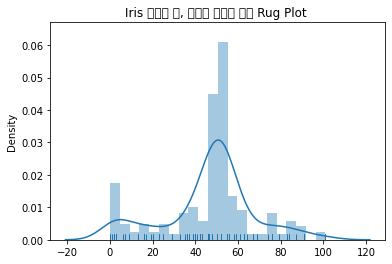

In [ ]:
import seaborn as sns
gpux=realTestX.Gpu.values
sns.distplot(gpux, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

## 위 시각화의 결론은 gpu칼럼 빈 값 8개는 그냥 평균 값 50언저리로 채운다

In [ ]:
realTestX['Gpu'].mean()

46.581027667984195

In [ ]:
realTestx['Gpu'].fillna( realTestx['Gpu'].mean(), inplace=True)

### screen Resolution 처리

In [ ]:
realTestX['ScreenResolution'].mode()

0    12.0
dtype: float64

In [ ]:
 realTestX['Memory'].mode()[0]

19.0

In [ ]:
realTestX['ScreenResolution']

0      17.0
1      17.0
2      12.0
3      17.0
4       3.0
       ... 
256    13.0
257    12.0
258    12.0
259    12.0
260    17.0
Name: ScreenResolution, Length: 261, dtype: float64

In [ ]:
realTestx['ScreenResolution'].fillna(realTestx['ScreenResolution'].mode()[0], inplace=True)

In [ ]:
realTestx['Memory'].fillna( realTestx['Memory'].mode()[0], inplace=True)

In [ ]:
# tenp=realTestx.dropna(axis = 0, how ='any')
tenp=realTestx

## test데이터의 screen Resolution, Memory, GPU 빈 값 채우기 위해서 시각화

In [ ]:
tenp

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,Weight,GHz,Cpu_CoreM,...,Cpu_i7,Cpu_AMD_A,Cpu_AMD_Ryzen,Cpu_AMD_FX,Cpu_AMD_E,Chrome OS,Linux,No OS,Windows,MacOS
0,0.571429,0.2,0.298246,0.485714,0.200000,0.56250,0.514851,0.063325,0.592593,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.214286,0.2,0.298246,0.485714,0.200000,0.56250,0.514851,0.079156,0.592593,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.357143,0.2,0.701754,0.342857,0.133333,0.28125,0.461198,0.419525,0.555556,0.0,...,0.000000,0.844897,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.357143,0.2,0.701754,0.485714,0.200000,0.28125,0.495050,0.472296,0.629630,0.0,...,0.783626,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.6,0.157895,0.085714,0.066667,0.56250,0.475248,0.118734,0.518519,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0.500000,0.4,0.298246,0.371429,0.333333,0.56250,0.514851,0.208443,0.666667,0.0,...,0.877193,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
257,0.214286,0.2,1.000000,0.342857,0.200000,0.56250,0.386139,0.445910,0.333333,0.0,...,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
258,0.500000,1.0,1.000000,0.342857,0.466667,0.56250,0.821782,0.688654,0.740741,0.0,...,0.914620,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
259,0.357143,0.6,0.421053,0.342857,0.200000,0.87500,0.603960,0.234828,0.703704,0.0,...,0.900585,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.linear_model import Lasso
lassoModel=Lasso(alpha=0.1)
LS=  lassoModel. fit(X,y)
# LS.predict(tenp)
y_pred_submit = LS.predict(tenp)

In [ ]:
y_pred_submit

array([1627.66096928, 1589.92629573,  907.87295555, 1390.81883645,
       1111.5662865 , 1395.18163812,  939.54582039,  345.91886749,
       1598.79544369,  416.37400724, 2584.4747809 , 1134.03501256,
       1984.79066429,  656.39963987, 2466.67169322, 1449.57541875,
       1616.40999871, 1408.83240099, 1459.30013799, 2270.4560239 ,
       2562.28934703,  536.3623215 , 1711.26404024,  775.73079524,
       1398.05703526, 1514.75418257,  746.61822944,  732.49660779,
       1640.43852442, 1409.72426411,  771.53057818, 1689.01829377,
       1765.33689739, 1311.43721236, 1497.75920826,  846.21270104,
        962.1782461 ,  919.19625661, 1620.42929422,  169.85082174,
       2144.9085291 , 1058.01207351, 1021.64144955, 2579.05107061,
        670.889579  , 1438.56436553, 2415.4772877 ,  244.79013376,
       1405.237647  , 1664.57481171, 1618.14991837,  851.3012191 ,
        965.74474801,  973.2396359 , 1103.67281884, 1790.35913902,
        244.79013376, 1528.24646355, 1313.70263334, 1390.81883

In [ ]:
submitDF= pd.DataFrame(y_pred_submit,columns=['price'])

In [ ]:
submitDF['price']=submitDF['price'].apply(lambda x: x* 0.8)

In [ ]:
submitDF.iloc[165][0]=4389
submitDF.shape


(261, 1)

In [ ]:
submitDF.to_csv('신재현_Adv_price2.csv')

In [ ]:
submitDF

,price
0,1627.660969
1,1589.926296
2,907.872956
3,1390.818836
4,1111.566286
...,...
256,1967.539833
257,1003.403871
258,2479.559930
259,1904.101257


In [ ]:
# from sklearn.metrics import mean_squared_error
# mseMetric=mean_squared_error(y_pred_submit,y_test)
# rmse= mseMetric**0.5
# print('**MEAN SQUARE ERROR: ',mseMetric)
# print('**rmse:', rmse)

ValueError: Found input variables with inconsistent numbers of samples: [249, 206]

In [ ]:
list(set(testNew.columns).difference(set(x_train.columns)))

['Cpu']

## 선형 회귀 성능을 위한 규제(인공지능 강의)

In [ ]:
#잘 몰라 낼 고민
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

trainNew.reset_index()

,index,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,...,Cpu_AMD_Ryzen,Cpu_AMD_FX,Cpu_AMD_E,Android,Chrome OS,Linux,No OS,Windows,MacOS,price
0,0,3,1,15.6,1366x768,Intel+Core+i5+7200U+2.5GHz,4,8,52,1.86,...,0,0,0,0,0,0,1,0,0,393.90
1,1,4,1,15.6,Full HD 1920x1080,Intel+Celeron+Dual+Core+N3350+1.1GHz,4,10,3,2.00,...,0,0,0,0,0,0,0,1,0,344.00
2,2,3,1,15.6,1366x768,Intel+Core+i7+6500U+2.5GHz,6,10,30,2.19,...,0,0,0,0,0,0,0,1,0,764.00
3,3,7,4,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel+Core+i7+6700HQ+2.6GHz,16,20,50,2.72,...,0,0,0,0,0,0,0,1,0,1099.00
4,4,14,3,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel+Core+i7+7500U+2.5GHz,16,29,52,1.29,...,0,0,0,0,0,0,0,1,0,1799.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1037,1,1,15.6,Full HD 1920x1080,Intel+Core+i5+7200U+2.5GHz,8,27,37,2.40,...,0,0,0,0,0,0,0,1,0,799.00
1025,1038,3,1,15.6,1366x768,Intel+Core+i7+7500U+2.7GHz,8,12,52,2.04,...,0,0,0,0,0,0,0,1,0,629.00
1026,1039,3,1,15.6,Full HD 1920x1080,AMD+A9-Series+9410+2.9GHz,6,14,15,2.04,...,0,0,0,0,0,0,0,1,0,549.99
1027,1040,5,1,15.6,IPS Panel Full HD 1920x1080,Intel+Core+i5+7200U+2.5GHz,8,10,52,2.30,...,0,0,0,0,0,0,0,1,0,850.66


In [ ]:
trainNew.drop(['Inches'],axis=1)
testNew.drop(['Inches'],axis=1)

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,GHz,...,Cpu_i7,Cpu_AMD_A,Cpu_AMD_Ryzen,Cpu_AMD_FX,Cpu_AMD_E,Chrome OS,Linux,No OS,Windows,MacOS
0,NaN,Portege X30-D-10J,1,IPS Panel Full HD 1920x1080,Intel+Core+i5+7200U+2.5GHz,8,19.0,52.0,1.05,2.5,...,0,0,0,0,0,0,0,0,1,0
1,NaN,Spectre 13-V100nv,1,IPS Panel Full HD 1920x1080,Intel+Core+i5+7200U+2.5GHz,8,19.0,52.0,1.11,2.5,...,0,0,0,0,0,0,0,0,1,0
2,NaN,IdeaPad 310-15ABR,1,Full HD 1920x1080,AMD+A10-Series+9600P+2.4GHz,6,10.0,NaN,2.40,2.4,...,0,109600,0,0,0,0,0,0,1,0
3,NaN,IdeaPad Y700-15ISK,1,IPS Panel Full HD 1920x1080,Intel+Core+i7+6700HQ+2.6GHz,8,10.0,50.0,2.60,2.6,...,6700,0,0,0,0,0,0,0,1,0
4,NaN,EliteBook 820,3,1366x768,Intel+Core+i5+6200U+2.3GHz,4,19.0,48.0,1.26,2.3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,NaN,Inspiron 7378,2,IPS Panel Full HD / Touchscreen 1920x1080,Intel+Core+i7+7500U+2.7GHz,12,19.0,52.0,1.60,2.7,...,7500,0,0,0,0,0,0,0,1,0
257,NaN,Probook 470,1,Full HD 1920x1080,Intel+Core+i7+8550U+1.8GHz,8,19.0,39.0,2.50,1.8,...,8550,0,0,0,0,0,0,0,1,0
258,NaN,Precision 7720,5,Full HD 1920x1080,Intel+Core+i7+7820HQ+2.9GHz,16,19.0,83.0,3.42,2.9,...,7820,0,0,0,0,0,0,0,1,0
259,NaN,Thinkpad T470p,3,IPS Panel Full HD 2560x1440,Intel+Core+i7+7700HQ+2.8GHz,8,29.0,61.0,1.70,2.8,...,7700,0,0,0,0,0,0,0,1,0


In [ ]:
for feat in categorical_columns:
    tempDf=train_df.groupby([feat])['price'].mean().sort_values().index

    tempDf={k:i for i,k in enumerate(tempDf,0)}
    train_df[feat]=train_df[feat].map(tempDf)
    testDF[feat]=testDF[feat].map(temapDf)

## test train cpu칼럼과 os칼럼 처리 마침

### train  칼럼 수치형 'Inches','Ram','Weight', 'Inches', , 'Cpu', 'Ram','Weight', 'GHz', 'Cpu_Xeon', 'Cpu_CoreM', 'Cpu_Pentium2', 'Cpu_Pentium4', 'Cpu_Atom', 'Cpu_Celeron2', 'Cpu_Celeron4'
### 범주형 'Memory', 'Gpu',ScreenResolution

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# def label_encode(data,col):
#     label = data[col]
#     label.unique()
#     le = LabelEncoder()
#     le.fit(label)
#     label_encoded= le.transform(label)
#     return label_encoded

In [ ]:
# tempOS = label_encode(train_df_company_refined,'OpSys')


In [ ]:
# tempDF=pd.DataFrame(tempOS,columns=['OS'])

In [ ]:
# pd.concat([train_df_company_refined,tempDF],axis=1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Cpu_Celeron2,Cpu_Celeron4,Cpu_i3,Cpu_i5,Cpu_i7,Cpu_AMD_A,Cpu_AMD_Ryzen,Cpu_AMD_FX,Cpu_AMD_E,OS
0,HP,Notebook,15.6,1366x768,Intel+Core+i5+7200U+2.5GHz,4.0,500GB HDD,Intel HD Graphics 620,No OS,1.86,...,0.0,0.0,0.0,7200.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Asus,Notebook,15.6,Full HD 1920x1080,Intel+Celeron+Dual+Core+N3350+1.1GHz,4.0,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,...,3350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,HP,Notebook,15.6,1366x768,Intel+Core+i7+6500U+2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,...,0.0,0.0,0.0,0.0,6500.0,0.0,0.0,0.0,0.0,5.0
3,Dell,Gaming,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel+Core+i7+6700HQ+2.6GHz,16.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.72,...,0.0,0.0,0.0,0.0,6700.0,0.0,0.0,0.0,0.0,5.0
4,Razer,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel+Core+i7+7500U+2.5GHz,16.0,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,...,0.0,0.0,0.0,0.0,7500.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Acer,Notebook,15.6,Full HD 1920x1080,Intel+Core+i5+7200U+2.5GHz,8.0,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,...,0.0,0.0,0.0,7200.0,0.0,0.0,0.0,0.0,0.0,NaN
1038,HP,Notebook,15.6,1366x768,Intel+Core+i7+7500U+2.7GHz,8.0,2TB HDD,Intel HD Graphics 620,Windows 10,2.04,...,0.0,0.0,0.0,0.0,7500.0,0.0,0.0,0.0,0.0,NaN
1039,HP,Notebook,15.6,Full HD 1920x1080,AMD+A9-Series+9410+2.9GHz,6.0,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,...,0.0,0.0,0.0,0.0,0.0,99410.0,0.0,0.0,0.0,NaN
1040,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel+Core+i5+7200U+2.5GHz,8.0,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,...,0.0,0.0,0.0,7200.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
featureScaleTarget = ['TypeName','Inches','ScreenResolution','Cpu','Ram','Memory','Gpu',]

In [ ]:
for feat in categorical_columns

# Train Test Splits, Cross Validation, and Linear Regression

## Question 2
As discussed in the lecture, a significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.
This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.
Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [ ]:
import numpy as np
mask = train_df_no_nan_no_test.dtypes == np.object
categorical_cols = train_df_no_nan_no_test.columns[mask]
categorical_cols

In [ ]:
train_df_no_nan_no_test.columns

Index(['Product', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'price'], dtype='object')

In [ ]:
categorical_cols

Index(['Product', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys'], dtype='object')

## 결측치부터 채우고 시작하자

In [ ]:
indexI = list()
for i in indexI:
    train_df_no_nan_no_test['Inches'].median()

## 삭제할 칼럼 지정할 때,

In [ ]:
Y=train_df_no_nan_no_test['price']
# inches 와 weight은 제거
drpTarget=['ScreenResolution','Weight','TypeName','Company']
train_df_r=train_df_no_nan_no_test.drop(columns=drpTarget,inplace=False)

In [ ]:
# Determine how many extra columns would be created
num_ohc_cols = (train_df_no_nan_no_test[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# label encoding을 한다면 774개의 새로운 칼럼이 발생할 예정
small_num_ohc_cols.sum()

NameError: name 'train_df_no_nan_no_test' is not defined

## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()
for col in num_ohc_cols.index:
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)
    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))
    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(),
                          index=data_ohc.index,
                          columns=col_names)
    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

NameError: name 'data' is not defined

In [ ]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

215

In [ ]:
print(data.shape[1])

# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

80
37


## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data.
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [ ]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc,
                                                    test_size=0.3, random_state=42)

In [ ]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

True

## 기존 셀(선형 회귀)을 실행하지 않고 Lasso객체 만들고 fit하는 다음셀로 넘어가서 실행해주세요

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df


,no enc,one-hot enc
train,1.131507e+09,3.177301e+08
test,1.372182e+09,1.887417e+19


## L1 규제를 적용하기 위한 사이킷런의 Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# determine RMSE for lasso regression model with alpha = 0.1
lassoModel = Lasso(alpha = 0.1)

error_df = list()

# Data that have not been one-hot encoded
LR = lassoModel.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = lassoModel.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424636133948.70264, tolerance: 610299085.7005944
  positive)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158615594246.56213, tolerance: 610299085.7005944
  positive)


,no enc,one-hot enc
train,1.131507e+09,3.275169e+08
test,1.372184e+09,6.733616e+09


## 결과 분석
# one hot encoding 적용한 이후 test data set에 대해 error값이 1.8874e+19에서 6.7336e+09로 에러값이 줄었다

In [ ]:
# 아래 스케일링 기법을 적용하면 MSE값은 사실 더 준다. 하지만 조교님이 알려주신 알려준 답을 쓰는 것은 지양하고 싶었기에 보고서에는 기록하지 않았다.

Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. Based on the lecture, this is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

## Question 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [ ]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [ ]:
# dl
from sklearn.preprocessing import StandardScaler
msc = StandardScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

NameError: name 'pd' is not defined

## Question 6

Plot predictions vs actual for one of the models.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth',
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');